# Three dimensional skyrmion structure

<img src="mayavi/system_3d_cylinder_finmag.png", width=800>

Three dimensional standard problem for the *Proposal for a micromagnetic standard problem for materials with Dzyaloshinskii-Moriya interaction* paper.

System:


    * An FeGe cylinder of 180 nm diameter and 20 nm thickness (along z direction)
    * Interactions: Exchange:                    8.78e-12  J m**-1
                    DMI:                         1.58e-3   J m**-2
                    Saturation Magnetisation:    3.84e5    A m**-1
                    

Here we observe a helical rotation along the thickness of the sample, which modifies the skyrmionic structure in every layer.


Relevant paper:

[x] Three-dimensional skyrmion states in thin films of cubic helimagnets. PRB **87**, 094424 (2013).

# Imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import scipy.optimize
import scipy.integrate
import scipy.interpolate

import pandas as pd

import os, glob

%matplotlib inline
plt.style.use('lato_style.mplstyle')

In [2]:
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

# Material

In [3]:
# System parameters for the finite difference simulations
# Since we use a 3x3x2 nm^3 cell, we use a slightly larger sample size to get
# the right sample dimensions

# Scale in nm
side_length_s = 183 
thickness_s = 22
cell_s = 3
cellz_s = 2

# scales in m
nm = 1e-9
side_length = side_length_s * nm
thickness = thickness_s * nm
cell = cell_s * nm
cellz = cellz_s * nm

# Bulk
A = 8.78e-12
D = 1.58e-3
Ms = 3.84e5
B = 0.4

initial_sk_diam = 20

Relevant parameters: Helix period $L_{D}$ and saturation field $H_{D}$

$$L_{D} = \frac{4\pi A}{|D|} \qquad H_{D}=\frac{D^{2}}{2 A M_{\text{s}}}$$

In [4]:
L_D = 4 * np.pi * A / D
H_D = (D ** 2) / (2 * A * Ms)

print('L_D =', L_D * 1e9, 'nm')
print('mu0 H_D =', H_D, 'T')

print('thickness / L_D = ', thickness / L_D)
print('H / H_D = ', B / H_D)

L_D = 69.83084430004654 nm
mu0 H_D = 0.3702187737281701 T
thickness / L_D =  0.31504702858054
H / H_D =  1.0804422368210223


# Finmag Simulation

    ===== Mesh info: ==============================
    107561 cells (= volume elements)
    222673 facets
     15102 surface facets
    207571 interior facets
    137320 edges
     22209 vertices

    ===== Distribution of edge lengths: ===========
    1.791 
    2.031 
    2.272 **
    2.513 ********
    2.754 *********************
    2.995 ************************************************
    3.236 **********************************************************************
    3.476 ************************************************************
    3.717 *******************************************************
    3.958 ************************************************
    4.199 ****************************************
    4.440 *****************************
    4.681 ******************
    4.921 **********
    5.162 *****
    5.403 **
    5.644 *
    5.885 
    6.126 
    6.366 
    6.607 


In [26]:
m_bottom = np.loadtxt('../sims/finmag/m_bottom.dat')
m_top = np.loadtxt('../sims/finmag/m_top.dat')
m_center = np.loadtxt('../sims/finmag/m_center.dat')

No handles with labels found to put in legend.


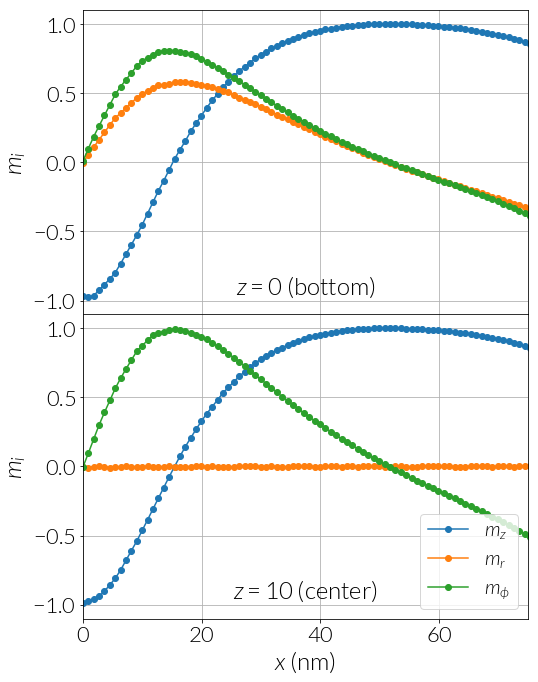

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 16 / 1.6))

# -----------------------------------------------------------------------------
# Plot at zs_F[0] --> this is z = -10 nm

ax1.plot(m_bottom[:, 0], m_bottom[:, 5], 'o-', label=r'$m_{z}$')
ax1.plot(m_bottom[:, 0], m_bottom[:, 6], 'o-', label=r'$m_{r}$')
ax1.plot(m_bottom[:, 0], m_bottom[:, 7], 'o-', label=r'$m_{\phi}$')

# ax1.axvline(x=r_sk_F, color='k', lw=1, ls='--')

ax1.grid()
plt.legend(loc=4)
ax1.set_xlim(0, 75)
ax1.set_ylim(-1.1, 1.1)

ax1.set_xlabel(r'$x$ (nm)')
ax1.set_ylabel(r'$m_{i}$')

ax1.text(0.5, 0.05, r'$z=$' + '{} (bottom)'.format(0),
         horizontalalignment='center', verticalalignment='bottom', 
         transform=ax1.transAxes)

# -----------------------------------------------------------------------------
# Plot at zs_F[5] --> this is z = 0 nm (middle of the sample)

ax2.plot(m_center[:, 0], m_center[:, 5], 'o-', label=r'$m_{z}$')
ax2.plot(m_center[:, 0], m_center[:, 6], 'o-', label=r'$m_{r}$')
ax2.plot(m_center[:, 0], m_center[:, 7], 'o-', label=r'$m_{\phi}$')

# ax2.axvline(x=r_sk_F, color='k', lw=1, ls='--')

ax2.grid()
ax2.legend(loc=4)
ax2.set_xlim(0, 75)
ax2.set_ylim(-1.1, 1.1)

ax2.set_xlabel(r'$x$ (nm)')
ax2.set_ylabel(r'$m_{i}$')

ax2.text(0.5, 0.05, r'$z=$' + '{} (center)'.format(10),
         horizontalalignment='center', verticalalignment='bottom', 
         transform=ax2.transAxes)

# ax2.set_xticklabels([])

# -----------------------------------------------------------------------------

plt.tight_layout()
plt.subplots_adjust(hspace=0)

plt.savefig('../paper/result_3d_cylinder_finmag.pdf', bbox_inches='tight')

The skyrmion radius at different slices, obtained from the Fidimag simulation:
    
    At z = 0.0  , r_sk = 15.167
    At z = 2.0  , r_sk = 15.260
    At z = 4.0  , r_sk = 15.310
    At z = 6.0  , r_sk = 15.392
    At z = 8.0  , r_sk = 15.428
    At z = 10.0 , r_sk = 15.453
    At z = 12.0 , r_sk = 15.464
    At z = 14.0 , r_sk = 15.416
    At z = 16.0 , r_sk = 15.350
    At z = 18.0 , r_sk = 15.256
    At z = 20.0 , r_sk = 15.159

We can export the data from the figure:

In [36]:
!mkdir -p data/results_3d_cylinder_finmag/

In [38]:
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mz_bottom_finmag.txt', np.column_stack((m_bottom[:, 0], m_bottom[:, 5])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mr_bottom_finmag.txt', np.column_stack((m_bottom[:, 0], m_bottom[:, 6])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mphi_bottom_finmag.txt', np.column_stack((m_bottom[:, 0], m_bottom[:, 7])))

np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mz_center_finmag.txt', np.column_stack((m_center[:, 0], m_center[:, 5])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mr_center_finmag.txt', np.column_stack((m_center[:, 0], m_center[:, 6])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mphi_center_finmag.txt', np.column_stack((m_center[:, 0], m_center[:, 7])))

np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mz_top_finmag.txt', np.column_stack((m_top[:, 0], m_top[:, 5])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mr_top_finmag.txt', np.column_stack((m_top[:, 0], m_top[:, 6])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mphi_top_finmag.txt', np.column_stack((m_top[:, 0], m_top[:, 7])))